# Overview 

In almost all programming languages one can find the extremely useful tool called functions. 

We have seen / met functinos already, such as:

- `abs()` and `sqrt()` functions from NumPy
- built in `print()` function 

In this lecture we learn the true power of functions and how to utelize them, i.e., building your own functions. 

We will like usual use the following imports. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

## Function Basics 

A function is a named part of a program that does a specific task. 
Many functions exist already, and we can use them as is (as long as you use the right arguments). 

Lets review some functions that are 'built-in' 

### Built-In Functions 

Built-in means that we do not have to `import` them. 
`print()` is an example, as well as: 

In [2]:
max(15,20)

20

In [3]:
str(35)

'35'

In [4]:
type(35)


int

In [5]:
type(str(35))

str

Two fun ones are called `any()` and `all()`. 
- `all()` will return True if all are True and if any are False it will return False 
- `any()` will return False if all are False and if one or more are True, it will return True 


In [8]:
some_bools = False, True, True, False
all(some_bools)

False

In [9]:
any(some_bools)

True

A full list of **built_in** functions is [here](https://docs.python.org/3/library/functions.html)

### Third Party Functions 

When built-in functions just do not achieve all that we set out to do, we either need to import some functions or create our own. 

For the first case, we have seen before importing and using functions. 
Another example is the calendar library, which we can test if a given year is a leap year. 

In [10]:
import calendar
calendar.isleap(2020)

True

## Defining Functions 

It is useful to define your own functions, and it will become clearer as we see more examples. 

How is it done? 

### Syntax 

A very simple python function that implements the mathematical function $f(x) = x^2 + 2x + 3$ 


In [11]:
def f(x):
    return x**2 + 2*x + 3

Now that this function is defined, lets see it in action: 

In [12]:
f(1)

6

In [13]:
f(3)

18

In [14]:
f(0)

3

We can also plot the function:

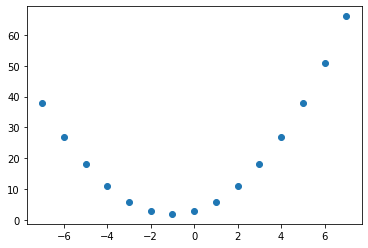

In [18]:
x_values = np.array([-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7])
plt.scatter(x_values, f(x_values))
plt.show()

A longer function, that finds the absolute value of a given number is written below: (there is a built-in function for this but we should practice).

In [19]:
def abs_function(x):
    if x < 0:
        abs_value = -x
    else:
        abs_value = x
    return abs_value

* `def` is a keyword in python used to start function definitions 
* `def abs_function(x):` indicates that the function is named `abs_function` and that it has a single argument `x`
* the *function body* is the code block indented 
* `return` keyword indicates that `abs_value` is the object that will be returned to the calling code

The function definition is read by the Python interpreter and stored into memory. 

We can then see if it works. 

In [20]:
print(abs_function(4))

4


In [21]:
print(abs_function(-4))

4


You may be wondering... 

### Why Write Functions? 

They improve the 'clarity' of your code by seperating different strands of logic and allowing code to be reused. 

A tenet of coding is 'writing the same thing twice is almost always a bad idea.'

### Applications
Like the previous lecture, we will return to random drawings. 

If your memory is lacking, here is the code from the previous lecture:


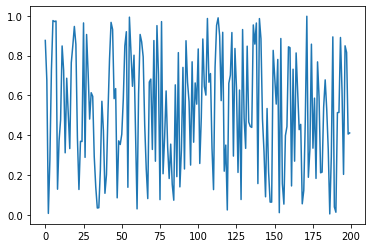

In [22]:
num_samples = 200 
random_values = [] # an empty list 

for i in range(num_samples):
    a = np.random.rand()
    random_values.append(a) 
    
plt.plot(random_values)
plt.show()

How can we use a function to help facilitate this procedure? 

Well we can break the program down into two components: 

1. A function that generates a list of random variables 
2. The main part of the program that 
    1. Calls this function to get data
    2. then plots the data 
    
This is seen below

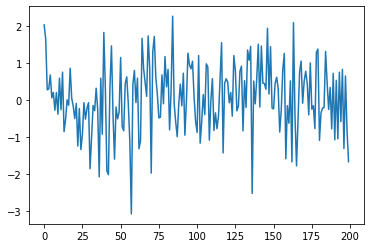

In [23]:
def generate_data(N):
    random_values = []
    for i in range(N):
        a = np.random.randn()
        random_values.append(a)
    return random_values 

data = generate_data(200)
plt.plot(data)
plt.show()

What happened here? 

Why the python interpeter recieved the expression `generate_data(200)` it executed the function body with `N` equal to 200. 

The result is that the name `data` is ***bound*** to the list `random_values` returned by the function `generate_data(200)`. 

### Adding Conditions 

The function we made is quite limited. 

Lets say we wanted to have the function `generate_data()` be able to return either standard normal or uniform random variables on $(0,1)$. We can do this by implementing arguments into the function.  

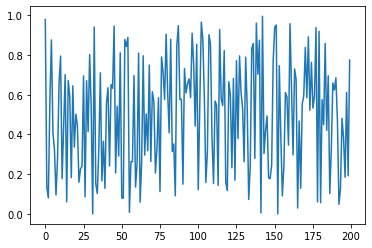

In [24]:
def generate_data(N, generator_type):
    random_values = []
    for i in range(N):
        if generator_type == 'U':
            a = np.random.uniform(0,1)
        else:
            a = np.random.rand()
        random_values.append(a)
    return random_values 

data = generate_data(200, 'U')
plt.plot(data)
plt.show()

Remarks:

- We pass the argument `U` as a string which is why we write is as `'U'` 
- Equality is *tested* using `==` syntax and not `=`, the key difference is:
    - The statement `a = 20` *assings' the name `a` to the value `20`
    - The expression `a == 20` evaluates to either `False` or `True`, depending of course on the value of `a` 

We can simplify `generate_data` even more, by just passing the desired generator type *as a function*. 



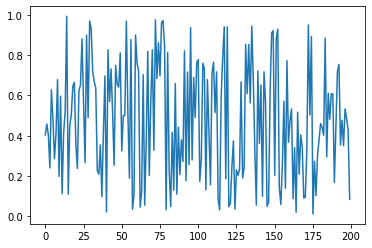

In [25]:
def generate_data(N, generator_type):
    random_values = []
    for i in range(N):
        a = generator_type()
        random_values.append(a)
    return random_values 

data = generate_data(200, np.random.uniform)
plt.plot(data)
plt.show()


Now when `generate_data()` is called, we pass `np.random.uniform` as the second argument. This object is a function. When the function call `generate_data(200, np.random.uniform)` is executed, Python runs the function block with `N` equal to 200 and the name `generator_type` **bound** to the function `np.random.uniform`. 

While these lines are executed, the names `generator_type` and `np.random.uniform` are synonyms per se, and are / can be used in identical ways. 

This is generalized below: 

In [26]:
max(10, 5, 0)

10

In [28]:
hi = max
hi(10, 5, 0)

10

We created a 'name' for the built in function `max()` which can be used in identical ways. 

Let's do some 

##  Excercises! 

### Excercise 1

$n!$ is '*n* factorial', and defined as $n! = n \times (n-1) \times (n-2) \times \dots \times (2) \times 1 $

Write a function `factorial` such that `factorial(n)` returns $n!$ for any positive integer $n$

In [30]:
def factorial(n):
    # Insert code here
    pass
    

### Excercise 2

A binary random variable $Y ~ Bi(n,p)$ represents the number of successes in $n$ binary trials, where each trial succeeds with probability $p$. 

Using only the import `from numpy.random import uniform`, write a function `binomial_rv` such that `binomial_rv(n,p)` generates one draw of $Y$

Hint: 
- If $U$ is uniform on $(0,1)$ and $p \in (0,1)$ then the expression $U<p$ evaluates to `True` with probability $p$. 

In [31]:
from numpy.random import uniform 

def binomial_rv(n,p):
    # insert code here 
    pass 

### Excercise 3

Write a function that returns one pass through of the following random device:
1. flip an unbaised coin 10 times 
2. if a heads occurs `k` or more times consecutively within this sequence at least once, pay one dollar 
3. if not, pay nothing 

Write another function that does the same except that rule 2 of the above device becomes: 
- If a hea doccurs `k` or moe times within this sequence, pay one dollar. 

Use only the imports given: 

In [32]:
from numpy.random import uniform 